In [1]:
# ==========================================
# STEP 1: IMPORT LIBRARIES
# ==========================================
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#-----------------------------------------


# ==========================================
# STEP 2: IMPORT DATASET
# ==========================================
#file_path = 'Loan_approval_data_2025.csv'

#try:
    #dataset = pd.read_csv(file_path)
    #print("Data Loaded Successfully.")
    
    # Handle Duplicates
    #dataset.drop_duplicates(inplace=True)
    
#except FileNotFoundError:
    #print(f"Error: The file '{file_path}' was not found. Exiting.")
    #exit()
#-------------------------------------------------


# ==========================================
# STEP 3: PREPROCESSING
# ==========================================
#dataset.columns = dataset.columns.str.strip()

# 1. Drop ID Column
#if 'customer_id' in dataset.columns:
    #dataset = dataset.drop(columns=['customer_id'])

# 2. Define Features (X) and Target (y) using ALL columns
# We use the raw dataset without extra "Noise Removal" or "Feature Engineering"
#X = dataset.drop(columns=['loan_status'])
#y = dataset['loan_status']

# 3. Identify Column Types for Pipeline
#categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
#numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

#print(f"Numerical Features: {len(numerical_cols)}")
#print(f"Categorical Features: {len(categorical_cols)}")
#----------------------------------------------


# 4. Create Preprocessing Pipeline
# Numerical: Impute Median -> Scale
#num_pipeline = Pipeline(steps=[
   # ('imputer', SimpleImputer(strategy='median')),
   # ('scaler', StandardScaler())
#])

# Categorical: Impute Frequent -> OneHot Encode
#cat_pipeline = Pipeline(steps=[
   # ('imputer', SimpleImputer(strategy='most_frequent')),
   # ('encoder', OneHotEncoder(handle_unknown='ignore'))
#])

#preprocessor = ColumnTransformer(
   # transformers=[
       # ('num', num_pipeline, numerical_cols),
      #  ('cat', cat_pipeline, categorical_cols)
    #])

#print("Preprocessing Pipeline Created.")
#--------------------------------------------

# ==========================================
# STEP 4: SPLITTING THE DATASET
# ==========================================
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
#--------------------------------------------

# ==========================================
# STEP 5: MODEL TRAINING (GRID SEARCH)
# ==========================================
#print("\nTraining Decision Tree on Full Feature Set...")

# Create full pipeline: Preprocessor -> Classifier
#full_pipeline = Pipeline(steps=[
    #('preprocessor', preprocessor),
    #('classifier', DecisionTreeClassifier(random_state=42))
#])

# Grid Search to find best parameters for this data
#param_grid = {
    #'classifier__criterion': ['gini', 'entropy'],
    #'classifier__max_depth': [8, 10, 12, 15, 20, None],
    #'classifier__min_samples_split': [2, 5, 10],
    #'classifier__min_samples_leaf': [1, 2, 4],
   # 'classifier__class_weight': ['balanced', None]
#}

#grid_search = GridSearchCV(
    #estimator=full_pipeline,
    #param_grid=param_grid,
    #cv=5,
    #n_jobs=-1,
    #scoring='accuracy'
#)

#grid_search.fit(X_train, y_train)
#best_model = grid_search.best_estimator_

#print(f" Best Model Params: {grid_search.best_params_}")
#----------------------------------------------

# ==========================================
# STEP 6: EVALUATION
# ==========================================
#y_pred = best_model.predict(X_test)
#acc = accuracy_score(y_test, y_pred)

#print(f"\n Final Model Accuracy: {acc*100:.2f}%")
#print("\nClassification Report:")
#print(classification_report(y_test, y_pred))
#-----------------------------------------

# ==========================================
# STEP 7: PREDICTION TABLE (First 10 Rows)
# ==========================================
#print("\n" + "="*40)
#print(" PREDICTION SAMPLE (First 10 Rows)")
#print("="*40)

# Reset index for clean display
#y_test_reset = y_test.reset_index(drop=True)

#results_df = pd.DataFrame({
   # 'Actual': y_test_reset[:10],
   # 'Predicted': y_pred[:10]
#})

# Add visual result column
#results_df['Result'] = np.where(results_df['Actual'] == results_df['Predicted'], '✅ Match', '❌ Fail')

#print(results_df)
#print("\n(0 = Rejected, 1 = Approved)\n")
#-----------------------------------------

# Confusion Matrix
#cm = confusion_matrix(y_test, y_pred)
#plt.figure(figsize=(6, 5))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            #xticklabels=['Rejected', 'Approved'],
            #yticklabels=['Actual Rejected', 'Actual Approved'])
#plt.title(f'Decision Tree Accuracy: {acc*100:.1f}%')
#plt.ylabel('Actual Value')
#plt.xlabel('Predicted Value')
#plt.tight_layout()
#plt.show()

In [2]:
# ==========================================
# STEP 1: IMPORT LIBRARIES
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [3]:
# ==========================================
# STEP 2: IMPORT DATASET
# ==========================================
file_path = 'Loan_approval_data_2025.csv'

try:
    dataset = pd.read_csv(file_path)
    print("Data Loaded Successfully.")
    
    # Handle Duplicates
    dataset.drop_duplicates(inplace=True)
    
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Exiting.")
    exit()

Data Loaded Successfully.


In [4]:
# ==========================================
# STEP 3: PREPROCESSING
# ==========================================
dataset.columns = dataset.columns.str.strip()

# 1. Drop ID Column
if 'customer_id' in dataset.columns:
    dataset = dataset.drop(columns=['customer_id'])

# 2. Define Features (X) and Target (y) using ALL columns
# We use the raw dataset without extra "Noise Removal" or "Feature Engineering"
X = dataset.drop(columns=['loan_status'])
y = dataset['loan_status']

# 3. Identify Column Types for Pipeline
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

print(f"Numerical Features: {len(numerical_cols)}")
print(f"Categorical Features: {len(categorical_cols)}")

Numerical Features: 15
Categorical Features: 3


In [5]:
# 4. Create Preprocessing Pipeline
# Numerical: Impute Median -> Scale
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical: Impute Frequent -> OneHot Encode
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_cols),
        ('cat', cat_pipeline, categorical_cols)
    ])

print("Preprocessing Pipeline Created.")

Preprocessing Pipeline Created.


In [6]:
# ==========================================
# STEP 4: SPLITTING THE DATASET
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [7]:
# ==========================================
# STEP 5: MODEL TRAINING (GRID SEARCH)
# ==========================================
print("\nTraining Decision Tree on Full Feature Set...")

# Create full pipeline: Preprocessor -> Classifier
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Grid Search to find best parameters for this data
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [8, 10, 12, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__class_weight': ['balanced', None]
}

grid_search = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
    )

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f" Best Model Params: {grid_search.best_params_}")


Training Decision Tree on Full Feature Set...
 Best Model Params: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}


In [8]:
# ==========================================
# STEP 6: EVALUATION
# ==========================================
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n Final Model Accuracy: {acc*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


 Final Model Accuracy: 80.61%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.78        45
           1       0.79      0.87      0.83        53

    accuracy                           0.81        98
   macro avg       0.81      0.80      0.80        98
weighted avg       0.81      0.81      0.80        98



In [9]:
# ==========================================
# STEP 7: PREDICTION TABLE (First 10 Rows)
# ==========================================
print("\n" + "="*40)
print(" PREDICTION SAMPLE (First 10 Rows)")
print("="*40)

# Reset index for clean display
y_test_reset = y_test.reset_index(drop=True)

results_df = pd.DataFrame({
    'Actual': y_test_reset[:10],
    'Predicted': y_pred[:10]
})

# Add visual result column
results_df['Result'] = np.where(results_df['Actual'] == results_df['Predicted'], '✅ Match', '❌ Fail')

print(results_df)
print("\n(0 = Rejected, 1 = Approved)\n")


 PREDICTION SAMPLE (First 10 Rows)
   Actual  Predicted   Result
0       0          0  ✅ Match
1       1          1  ✅ Match
2       0          1   ❌ Fail
3       0          0  ✅ Match
4       1          1  ✅ Match
5       1          1  ✅ Match
6       1          1  ✅ Match
7       0          1   ❌ Fail
8       0          0  ✅ Match
9       1          1  ✅ Match

(0 = Rejected, 1 = Approved)



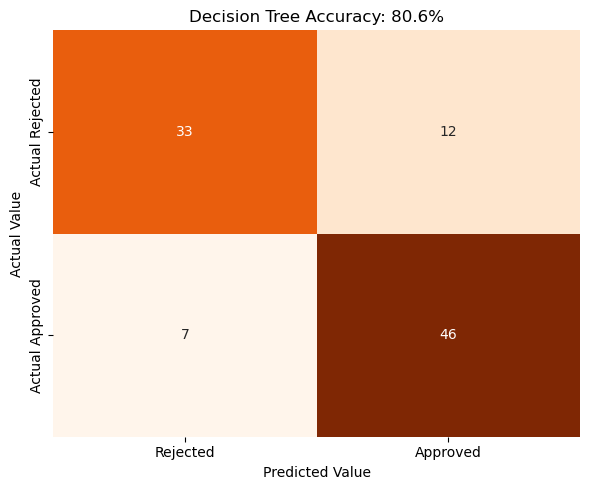

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Actual Rejected', 'Actual Approved'])
plt.title(f'Decision Tree Accuracy: {acc*100:.1f}%')
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.tight_layout()
plt.show()